# Our First Notebook

## Lecture 4
<a id= "TOC"></a>
 1. <a href= "#Setup">Setup the Enviorment </a>
 2. <a href= "#LoadData"> Load the Data </a>
 2. <a href= "#SplitPrep"> Split and Prep Data Sets </a>
 2. <a href= "#Transform1"> Transformations </a>
 2. <a href= "#LogRegFit"> Logistic Regression </a>
 2. <a href= "#LogRegPredTrain"> Predictions on Training Data </a>
 2. <a href= "#LogRegPerf"> Performance Estimates </a>
 2. <a href= "#LogRegPredTest"> Predictions on test Data</a>

<a id= "Setup"></a> 
## **Set Up** <a href="#TOC">TOC</a>

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt 

In [2]:
#Define paths
class_path= "/Users/james/Documents/ADEC7430"
proj_path= os.path.join(class_path, "LectureNotes")
raw_data_folder= os.path.join(class_path, "RawData")
saved_data_folder= os.path.join(class_path, "SavedData")
output_data_folder= os.path.join(class_path, "Output")


In [17]:
if os.path.exists(raw_data_folder): 
    print("exists")
else:
    print("Need to Create", raw_data_folder, 'directory', sep=" ")

exists


In [45]:
if os.path.exists(saved_data_folder): 
    print("exists")
else:
    print("Need to Create", saved_data_folder, 'directory', sep=" ")

exists


In [47]:
def CheckFolder(mypath):
    if os.path.exists(raw_data_folder): 
        print("exists")
    else:
        print("Need to Create", raw_data_folder, 'directory', sep=" ")

In [48]:
CheckFolder(raw_data_folder)

exists


<a id= "LoadData"></a>
## **Load the Data** <a href="#TOC">TOC</a>

We define the path to the training data set. It should live withinh the RawData Folder

In [4]:
raw_train_data_file= os.path.join(raw_data_folder, "TitanicTrain.csv")
raw_train_data= pd.read_csv(raw_train_data_file)

In [5]:
type(raw_train_data)

pandas.core.frame.DataFrame

In [6]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [7]:
raw_train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
raw_train_data.shape

(891, 12)

<a id= "SplitPrep"></a>
## **Split and Prep Data** <a href="#TOC">TOC</a>

Save 30% of the data set for validation

### Smarter Methood

### Manual Methood

 1. Generate an array of random numbers between 0 and 1
 1. Uniformly dist.
 1. filter raw_train_data for the random values <.3, save as 'validation'
 1. filter raw_train_data for the random values >.3, save as 'train'

In [5]:
import random
nrows= raw_train_data.shape[0]

In [6]:
myrandoms= [random.uniform(0,1) for i in range(nrows)]

Lets plot a histogram of these randomly generated numbers, to see their distribution 

(array([101.,  98.,  89.,  86.,  74.,  91., 104.,  70.,  74., 104.]),
 array([0.00460015, 0.10409454, 0.20358893, 0.30308332, 0.40257771,
        0.50207211, 0.6015665 , 0.70106089, 0.80055528, 0.90004967,
        0.99954406]),
 <a list of 10 Patch objects>)

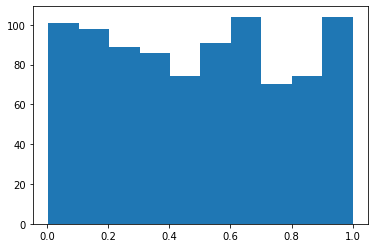

In [11]:
plt.hist(myrandoms, bins=10)

In [7]:
valid_filt= [x < .3 for x in myrandoms]
train_filt= [x>= .3 for x in myrandoms]

In [13]:
import collections 
collections.Counter(valid_filt)

Counter({False: 605, True: 286})

In [8]:
validation_data= raw_train_data[valid_filt]
validation_data.shape

(257, 12)

In [9]:
train_data=raw_train_data[train_filt]

Save Validation Set so we don't use/infer from it


In [10]:
validation_data_file= os.path.join(saved_data_folder, "validation_data.pkl")

In [11]:
validation_data.to_pickle(validation_data_file)
del validation_data

In [12]:
train_data_file= os.path.join(saved_data_folder, "train_data.pkl")
train_data.to_pickle(train_data_file)

In [20]:
train_data.shape

(605, 12)

<a id= "Transform1"></a>
## **Transformation 1** <a href="#TOC">TOC</a>

In [49]:
train_data = pd.read_pickle(train_data_file)

In [16]:
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Fare"], inplace=True)

In [19]:
X_train = train_data.copy().drop(columns=['Survived'])

In [18]:
y_train = train_data['Survived']

In [56]:
train_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [50]:
def encode_embarked(df):
    """df= pandas data frame with a vairable named 'Embarked' which we are encoding"""
    pass
df = train_data.copy()

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [32]:
df.Embarked.value_counts(dropna=False)

S      460
C      114
Q       58
NaN      2
Name: Embarked, dtype: int64

In [51]:
def encode_embarked(df_):
    """df= pandas data frame with a vairable named 'Embarked' which we are encoding"""
    pass
    df = df_.copy()
    #variables set to 0
    df['Emb_S']=0
    df['Emb_C']=0
    df['Emb_Q']=0
    df['Emb_0']=0
    #filter for each level we want to encode
    filter_=df.Embarked=='S'
    df.loc[filter_, 'Emb_S']=1
    filter_=df.Embarked=='C'
    df.loc[filter_, 'Emb_C']=1
    filter_=df.Embarked=='Q'
    df.loc[filter_, 'Emb_Q']=1
    filter_[:10]
    filter_=df.Embarked.isin(['S','C', 'Q'])
    filter_[:10]
    filter_.value_counts(dropna=False)
    df.loc[~filter_, 'Emb_0']=1
    return(df_)

In [45]:
pd.crosstab(df['Emb_S'] ,df['Emb_C'])

Emb_C,0,1
Emb_S,,
0,60,114
1,460,0


In [46]:
df[['Emb_S','Emb_Q','Emb_C','Emb_0']].agg(sum, axis=0)

Emb_S    460
Emb_Q     58
Emb_C    114
Emb_0      2
dtype: int64

In [47]:
df[['Emb_S','Emb_Q','Emb_C','Emb_0']].agg(sum, axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
885    1
887    1
888    1
889    1
890    1
Length: 634, dtype: int64

In [52]:
train1=df.copy()

In [58]:
def encode_sex(df_):
    df = df_.copy() # this is small, so it's OK to copy...
    df['sex_m'] = 0
    df['sex_f'] = 0
    df['sex_o'] = 0
    filter_ = df.Sex=="male"
    df.loc[filter_,'sex_m'] = 1
    filter_ = df.Sex=="female"
    df.loc[filter_,'sex_f'] = 1
    filter_ = df.Sex.isin(['male','female'])
    df.loc[~filter_,'sex_o'] = 1
    return(df)

    

In [59]:
train2 = encode_sex(train1)
train2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
sex_m            int64
sex_f            int64
sex_o            int64
dtype: object

In [57]:
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_m,sex_f,sex_0,sex_o
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,NaN


In [60]:
def trans_drop_vars(df_):
    df = df_.copy()
    df.drop(columns=['Fare','Cabin','Name','Ticket', 'Embarked','Sex'], inplace=True)
    return(df)
train3 = trans_drop_vars(train2)

**Stack The Functions**

In [61]:
validation_data = pd.read_pickle(train_data_file)

In [62]:
def transform_data(df_):
    df = df_.copy()
    train1 = encode_embarked(df)
    train2 = encode_sex(train1)
    train3 = trans_drop_vars(train2)
    return(train3) # once this function returns, "train3" ceases to exist
train3= transform_data(train_data)

In [63]:
valid3=transform_data(validation_data)

In [64]:
print(train3.shape)
print(valid3.shape)

(634, 13)
(634, 13)


In [66]:
train3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Emb_S,Emb_C,Emb_Q,Emb_0,sex_m,sex_f,sex_o
0,1,0,3,22.0,1,0,1,0,0,0,1,0,0
1,2,1,1,38.0,1,0,0,1,0,0,0,1,0
2,3,1,3,26.0,0,0,1,0,0,0,0,1,0
3,4,1,1,35.0,1,0,1,0,0,0,0,1,0
4,5,0,3,35.0,0,0,1,0,0,0,1,0,0


**Fill in NA for Age**

<a id= "LogRegFit"></a>
## **Logistic Regression** <a href="#TOC">TOC</a>

In [14]:
import sklearn
from sklearn import linear_model

In [65]:
y_train= train3['Survived']

In [ ]:
x_train=train3.drop(columns=["Pclass", "Sex", "Embarked"])

<a id= "LogRegPredTrain"></a>
## **Predictions on Training Data** <a href="#TOC">TOC</a>

<a id= "LogRegPerf"></a>
## **Performance** <a href="#TOC">TOC</a>

<a id= "LogRegPredTest"></a>
## **Predictions on Test Data** <a href="#TOC">TOC</a>